# Day 9: Smoke Basin 
from [AdventOfCode website](https://adventofcode.com/2021])

> These caves seem to be lava tubes. Parts are even still volcanically active; small hydrothermal vents release smoke into the caves that slowly settles like rain.
> 
> If you can model how the smoke flows through the caves, you might be able to avoid it and be that much safer. The submarine generates a heightmap of the floor of the nearby caves for you (your puzzle input).
> 
> Smoke flows to the lowest point of the area it's in. For example, consider the following heightmap:
> 
> ```
> 2199943210
> 3987894921
> 9856789892
> 8767896789
> 9899965678
> ```
> 
> Each number corresponds to the height of a particular location, where 9 is the highest and 0 is the lowest a location can be.
> 
> Your first goal is to find the **low points** - the locations that are lower than any of its adjacent locations. Most locations have four adjacent locations (up, down, left, and right); locations on the edge or corner of the map have three or two adjacent locations, respectively. (Diagonal locations do not count as adjacent.)
> 
> In the above example, there are **four** low points, all highlighted: two are in the first row (a 1 and a 0), one is in the third row (a 5), and one is in the bottom row (also a 5). All other locations on the heightmap have some lower adjacent location, and so are not low points.
> 
> The risk level of a low point is **1 plus its height**. In the above example, the risk levels of the low points are 2, 1, 6, and 6. The sum of the risk levels of all low points in the heightmap is therefore **15**.
> 
> Find all of the low points on your heightmap. What is the sum of the risk levels of all low points on your heightmap?

Original values
[[2 1 9 9 9 4 3 2 1 0]
 [3 9 8 7 8 9 4 9 2 1]
 [9 8 5 6 7 8 9 8 9 2]
 [8 7 6 7 8 9 6 7 8 9]
 [9 8 9 9 9 6 5 6 7 8]]



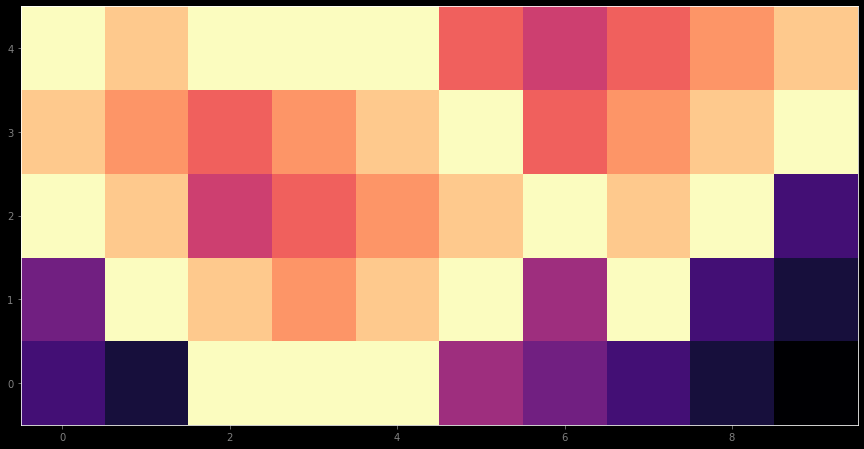

In [180]:
from functools import reduce
from collections import Counter
import numpy as np

def disp(message, val):
    print(f'{message}\n{val}\n')

# Read 1 char as a single value
values_m = np.genfromtxt('input_day9_sample.txt', delimiter=1, dtype=np.uint8)
disp('Original values', values_m)

# Padding is not required using kernel but let here as it is cool
#values_m = np.pad(values_m, pad_width=1, constant_values=10)
#disp('Padded values', values_m)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize = (15,15))
plt.tick_params(axis='both', colors='gray')
plt.style.use('dark_background')
plt.imshow(values_m, vmin=abs(values_m).min(), vmax=abs(values_m).max(), origin='lower', cmap='magma', interpolation='antialiased')

## Solution using scipy
The idea is to use `scipy.ndimage` which can apply an image filter (here `minimum_filter`) using a configurable kernel applied to each cell 

The kernel is a von Neumann neighborhood:
```
[[0, 1, 0]
 [1, 0, 1]
 [0, 1, 0]]
```

The filter is applied as follows : 
- For each cell, apply the kernel
- take the values that are marked with 1 in kernel
- take the minimum of all those values
- put that value in the cell
- pad the missing value (on borders for instance) with a constant which is 9

In [181]:
# Create the condition matrix
# Earliest attempts...
# cond_m = values_m != values_m
# cond_m = np.zeros(np.shape(values_m), dtype=bool)

import scipy.ndimage as improc    

# Take the Von Neumann neighborhood
kernel = np.asarray([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0]
])

min_m = improc.minimum_filter(values_m, footprint=kernel, mode='constant', cval=9)
disp('Min convolution', min_m)

cond_m = (values_m < min_m)

disp('Condition matrix applied', cond_m)

min_values = np.extract(cond_m, values_m)
print(min_values)

print(f'The wanted solution is {sum(min_values + 1)}')

Min convolution
[[1 2 1 7 4 3 2 1 0 1]
 [2 1 5 6 7 4 3 2 1 0]
 [3 5 6 5 6 7 4 7 2 1]
 [7 6 5 6 7 6 5 6 7 2]
 [8 7 6 7 6 5 6 5 6 7]]

Condition matrix applied
[[False  True False False False False False False False  True]
 [False False False False False False False False False False]
 [False False  True False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False  True False False False]]

[1 0 5 5]
The wanted solution is 15


## Part 2
Next, you need to find the largest basins so you know what areas are most important to avoid.

A **basin** is all locations that eventually flow downward to a single low point. Therefore, every low point has a basin, although some basins are very small. Locations of height 9 do not count as being in any basin, and all other locations will always be part of exactly one basin.

The **size** of a basin is the number of locations within the basin, including the low point. The example above has four basins.

The top-left basin, size 3:

```
2199943210
3987894921
9856789892
8767896789
9899965678
```

The top-right basin, size 9:

```
2199943210
3987894921
9856789892
8767896789
9899965678
```
The middle basin, size 14:

```
2199943210
3987894921
9856789892
8767896789
9899965678
```

The bottom-right basin, size 9:

```
2199943210
3987894921
9856789892
8767896789
9899965678
```

Find the three largest basins and multiply their sizes together. In the above example, this is 9 * 14 * 9 = 1134.

What do you get if you multiply together the sizes of the three largest basins?

## Considerations for this solution
I dediced to use image processing again. Here the solution is trivial using labeling from `scipy`. This process labels the values in a given contiguous neighbourhood with unique integers. 

We then just have to compute the size of each basin (which is easy because they have unique ids), take the 3 largest and multiply their sizes together to get the correct result.

Labeled basins
[[1 1 0 0 0 2 2 2 2 2]
 [1 0 3 3 3 0 2 0 2 2]
 [0 3 3 3 3 3 0 4 0 2]
 [3 3 3 3 3 0 4 4 4 0]
 [0 3 0 0 0 4 4 4 4 4]]

Here are the basins sizes
[3, 9, 14, 9]

The solution is the product of the three largest basins : 1134


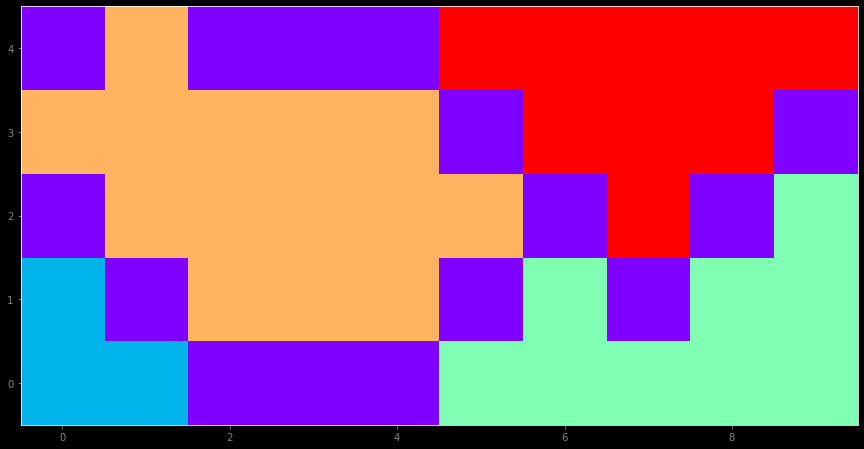

In [182]:
thebasins, nbasins = improc.label(values_m < 9)

disp(f'Labeled basins', thebasins)

sizes=[]

for i in range(nbasins):
    sizes.append((thebasins == i+1).sum())

disp('Here are the basins sizes', sizes)
three_largest = sorted(sizes)[-3:]
prod = reduce(lambda x, y : x * y, three_largest, 1)
print(f'The solution is the product of the three largest basins : {prod}')

plt.figure(figsize = (15,15))
plt.tick_params(axis='both', colors='gray')
plt.style.use('dark_background')
plt.imshow(thebasins, vmin=abs(thebasins).min(), vmax=abs(thebasins).max(), origin='lower', cmap='rainbow', interpolation='None')